In [1]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#for normalizing data
from sklearn.preprocessing import MinMaxScaler

#warnings
import warnings
warnings.simplefilter('ignore', FutureWarning)


In [2]:
#read the file
df = pd.read_csv('AMZN.csv')

#print the head
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-04-29,140.089996,142.449997,139.789993,141.729996,141.729996,6314200
1,2010-04-30,141.399994,141.399994,136.910004,137.100006,137.100006,6113500
2,2010-05-03,137.199997,139.440002,136.110001,137.490005,137.490005,5654600
3,2010-05-04,135.619995,135.809998,128.380005,129.830002,129.830002,12667800
4,2010-05-05,128.000000,131.610001,127.550003,130.929993,130.929993,9458100


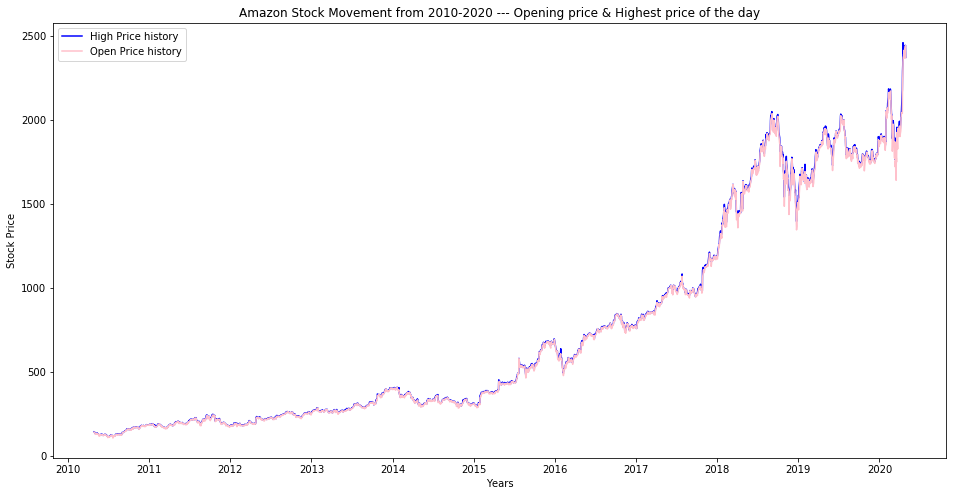

In [3]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['High'], label='High Price history', color = 'blue')
plt.plot(df['Open'], label='Open Price history', color = 'pink')

plt.title("Amazon Stock Movement from 2010-2020 --- Opening price & Highest price of the day")
plt.xlabel('Years')
plt.ylabel('Stock Price')
plt.legend()

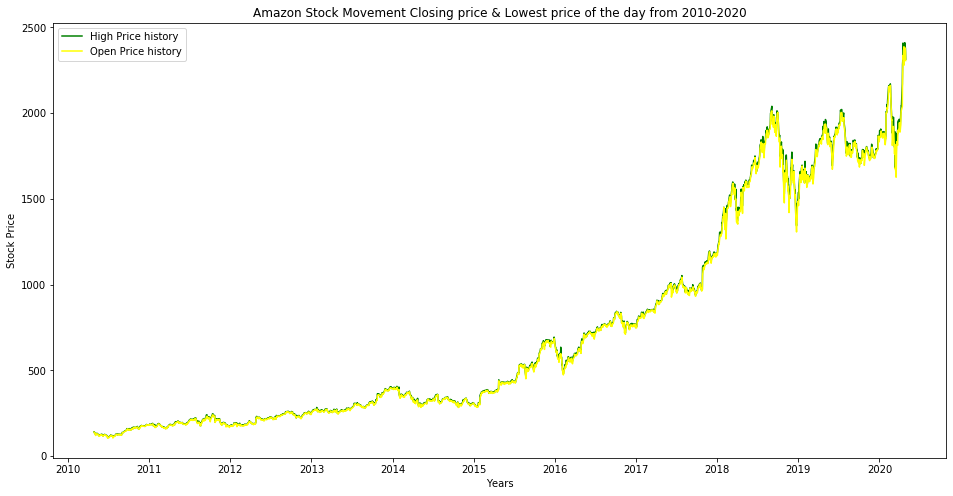

In [4]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='High Price history', color = 'green')
plt.plot(df['Low'], label='Open Price history', color = 'yellow')

plt.title("Amazon Stock Movement Closing price & Lowest price of the day from 2010-2020")
plt.xlabel('Years')
plt.ylabel('Stock Price')
plt.legend()

In [5]:
# Predictor variables
df['Open-Close']= df.Open -df.Close
df['High-Low']  = df.High - df.Low
df =df.dropna()
X= df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2010-04-29,-1.640000,2.660004
2010-04-30,4.299988,4.489990
2010-05-03,-0.290008,3.330001
2010-05-04,5.789993,7.429993
2010-05-05,-2.929993,4.059998


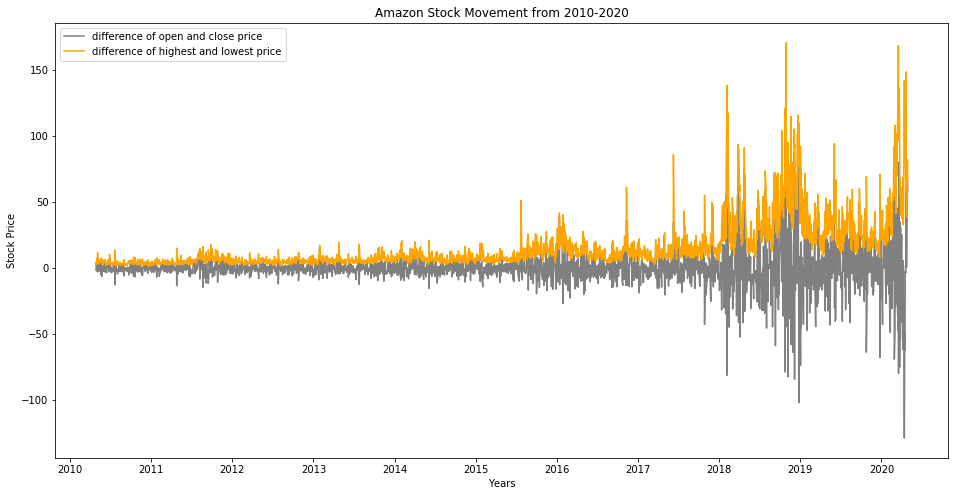

In [6]:
#plot
plt.figure(figsize=(16,8))
plt.plot(X['Open-Close'], label='difference of open and close price', color = 'grey')
plt.plot(X['High-Low'], label='difference of highest and lowest price', color = 'orange')

plt.title("Amazon Stock Movement from 2010-2020")
plt.xlabel('Years')
plt.ylabel('Stock Price')
plt.legend()

In [7]:
# Target variable
Y = np.where(df['Close'].shift(-1)>df['Close'],1,-1)

In [8]:
# Splitting the dataset
split_percentage = 0.7
split = int(split_percentage*len(df))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

The optimal number of neighbors is 7


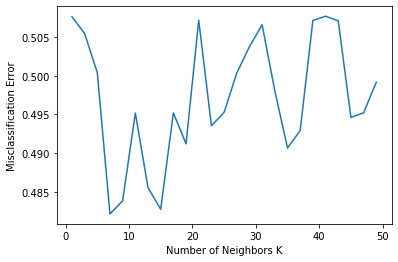

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# creating odd list of K for KNN
neighbors = list(range(1, 50, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=20, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

In [10]:
# Machine learning libraries
from sklearn.metrics import accuracy_score

# Instantiate KNN learning model(k=15)
knn = KNeighborsClassifier(n_neighbors=optimal_k)

# fit the model
knn.fit(X_train, Y_train)

# Accuracy Score
accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.66
Test_data Accuracy: 0.52


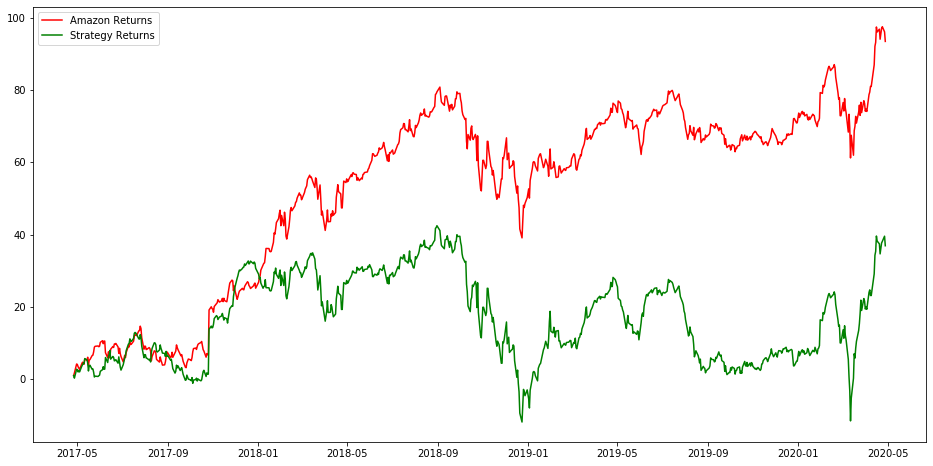

In [11]:
# Predicted Signal
df['Predicted_Signal'] = knn.predict(X)

# Amazon Cumulative Returns
df['Amazon_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_Amazon_returns = df[split:]['Amazon_returns'].cumsum()*100

# Cumulative Strategy Returns 
df['Startegy_returns'] = df['Amazon_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = df[split:]['Startegy_returns'].cumsum()*100

# Plot the results to visualize the performance

plt.figure(figsize=(16,8))
plt.plot(Cumulative_Amazon_returns, color='r',label = 'Amazon Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [12]:
# Calculate Sharpe reatio
Std = Cumulative_Strategy_returns.std()
Sharpe = (Cumulative_Strategy_returns-Cumulative_Amazon_returns)/Std
Sharpe = Sharpe.mean()
print ('Sharpe ratio: %.2f'%Sharpe )

Sharpe ratio: -3.05
